# Figure 3

In [1]:
%load_ext autoreload
%autoreload 2

from flyvis import EnsembleView

[2025-07-22 17:23:24] font_manager:1639 generated new fontManager


In [2]:
ensemble = EnsembleView(
    "flow/0000",
    best_checkpoint_fn_kwargs={
        "validation_subdir": "validation",
        "loss_file_name": "loss",
    },
)

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2025-07-22 17:23:39] ensemble:166 Loaded 50 networks.


In [25]:
T4__CELL_TYPE = "T4"
T5__CELL_TYPE = "T5"
CELL_TYPE = "T5d"
if CELL_TYPE.startswith(T4__CELL_TYPE):
    INTENSITY = 1
elif CELL_TYPE.startswith(T5__CELL_TYPE):
    INTENSITY = 0
else:
    raise ValueError(f"Unaccounted for cell type {CELL_TYPE}")

## a

In [26]:
task_error = ensemble.task_error()

In [27]:
embedding_and_clustering = ensemble.clustering(CELL_TYPE)

/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/mnt/home/ckaneen/Software/flyvis-ckaraneen/.flyvis-env/lib64/python3.11/site-packages/sklearn/base.py:440: InconsistentVersionWarning: Trying to unpickle estimator GaussianMixture from version 1.1.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
[2025-07-22 19:59:33] clustering:835 Loaded T5d embedding and clustering from /mnt/home/ckaneen/Software/flyvis-ckaraneen

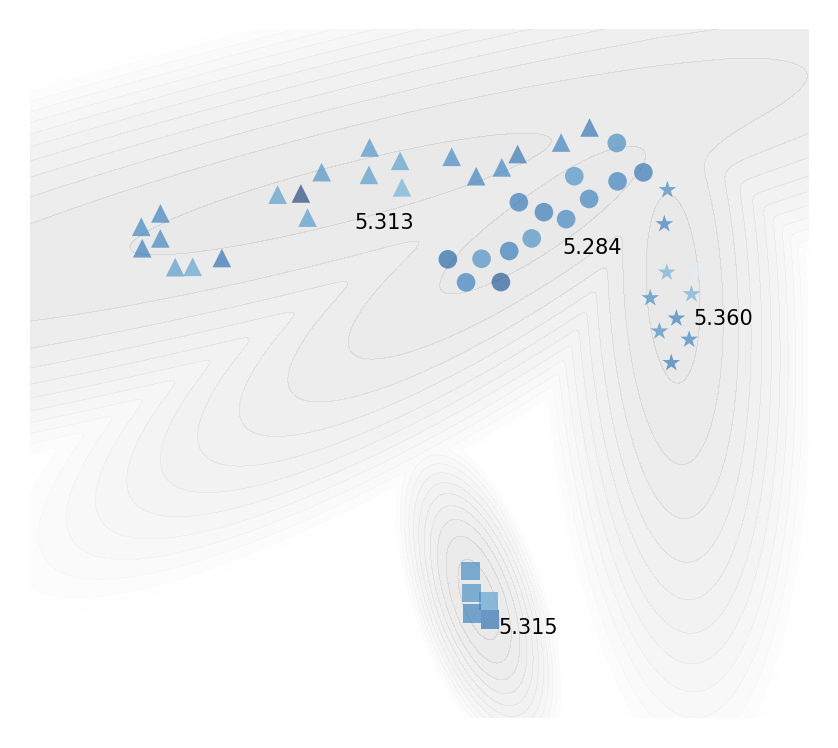

In [28]:
embeddingplot = embedding_and_clustering.plot(
    task_error=task_error.values, colors=task_error.colors
)

## b

In [29]:
import numpy as np
import matplotlib.pyplot as plt

from flyvis.analysis.visualization import plt_utils
from flyvis.analysis.moving_bar_responses import plot_angular_tuning

In [30]:
cluster_indices = ensemble.cluster_indices(CELL_TYPE)

In [ ]:
r = ensemble.moving_edge_responses()
r['responses'] /= np.abs(r['responses']).max(dim=('frame', 'sample'))

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/000/__cache__/flyvis/analysis/stimulus_responses/compute_responses/f5f7ab0e86eec6a74f7c7348ff271874/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/e4bde032c338b1cd29735e20d7295560/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/205d5ca11f565fb4051fa31c35611447/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/003/__cache__/flyvis/analysis/stimulus_responses/compute_responses/5c6c920ba6d8823e0ecde6bebde9038d/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/004/__cache__/flyvis/analysis/stimulus_responses/compute_responses/6dff21380290115f37d551ec4e3fb63c/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/005/__cache__/flyvis/analysis/stimulus_responses

In [32]:
cluster_indices = ensemble.cluster_indices(CELL_TYPE)

In [33]:
colors = ensemble.task_error().colors

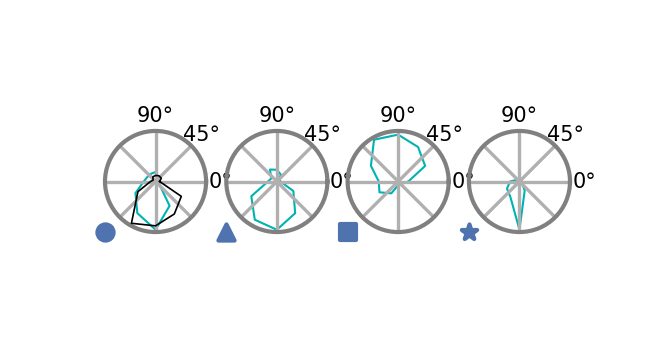

In [39]:
fig, axes = plt.subplots(
    1, len(cluster_indices), subplot_kw={"projection": "polar"}, figsize=[2, 1]
)
for cluster_id, indices in cluster_indices.items():
    plot_angular_tuning(
        r.sel(network_id=indices),
        CELL_TYPE,
        intensity=INTENSITY,
        linewidth=0.5,
        # colors=colors[indices],
        zorder=ensemble.zorder()[indices],
        groundtruth=True if cluster_id == 0 else False,
        groundtruth_linewidth=0.4,
        average_models=True,
        fig=fig,
        ax=axes[cluster_id],
    )
    plt_utils.add_cluster_marker(
        fig, axes[cluster_id], marker=plt_utils.get_marker(cluster_id)
    )

## e

/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/001/__cache__/flyvis/analysis/stimulus_responses/compute_responses/ad56d3b5d2fad3552ba120a2a9885973/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/002/__cache__/flyvis/analysis/stimulus_responses/compute_responses/b5adf2f694596f6e87bf125c5bc83aae/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/006/__cache__/flyvis/analysis/stimulus_responses/compute_responses/3acf44b349c71ba78a6d1b15d499c4f5/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/008/__cache__/flyvis/analysis/stimulus_responses/compute_responses/89be806821a3e46d7e1964f6295d06db/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/010/__cache__/flyvis/analysis/stimulus_responses/compute_responses/bf238ed9ad0707cb37afead35a3e8a86/output.h5
/mnt/home/ckaneen/Software/flyvis-ckaraneen/data/results/flow/0000/012/__cache__/flyvis/analysis/stimulus_responses

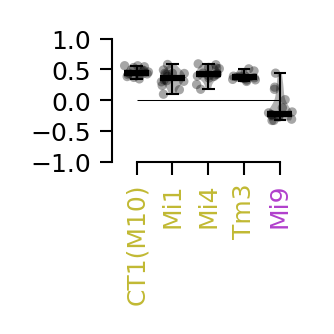

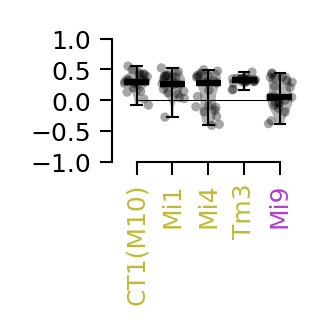

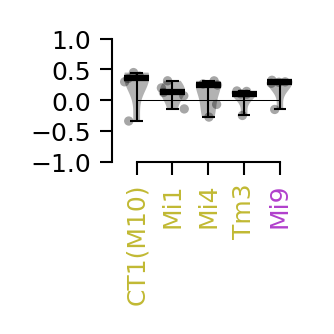

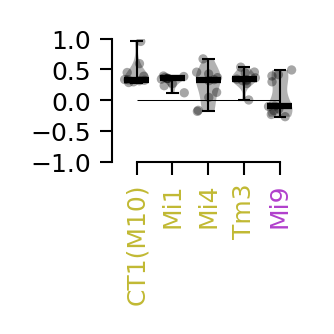

In [35]:
for cluster_id, indices in cluster_indices.items():
    with ensemble.select_items(indices):
        fig, ax = ensemble.flash_response_index(
            cell_types=["Mi1", "Tm3", "Mi4", "Mi9", "CT1(M10)"],
            figsize=[1, 1],
            scatter_best=False,
        )